In [2]:
import sys
import os

# Add the script's directory to the Python path
sys.path.append('/kaggle/input/bert-fine2be')

In [3]:
#!pip install transformers datasets

In [4]:
from bert_finetune2 import QADataGen

Generating train split: 0 examples [00:00, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss
1,No log,4.215715
2,No log,3.396696
3,No log,2.884476
4,No log,2.290786
5,No log,1.844388
6,No log,1.567895
7,No log,1.387054
8,No log,1.251402
9,No log,1.179281
10,No log,1.158551


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


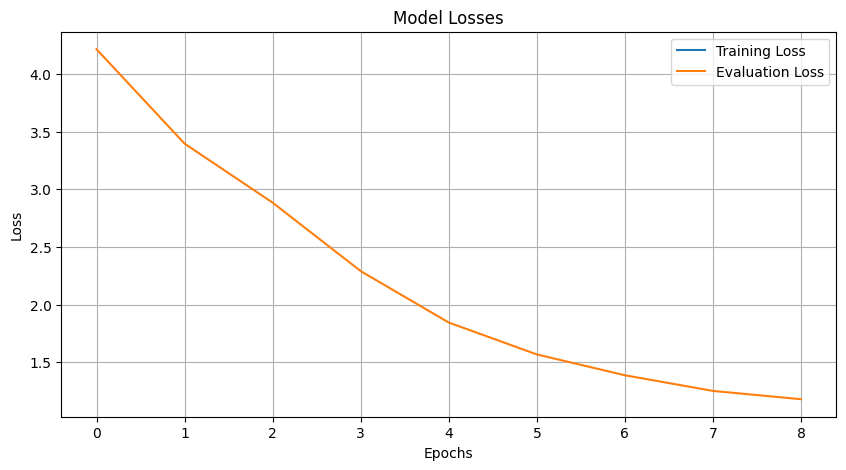

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

      question                                    answer   qid     score
0            0                     community engagement.     0  1.415202
1            1                          flight pollution     1  5.913549
2            2                  environmental pollution.     2  3.004199
3            3                TRANSNATIONAL CORPORATION:     3  3.664166
4            4                  Renewable energy sources     4  0.483517
...        ...                                       ...   ...       ...
1995      1995                    transportation sector.  1995  1.710897
1996      1996                     a billion metric tons  1996  7.217097
1997      1997                             carbon traces  1997  7.061112
1998      1998               CARBON CAPTURE AND STORAGE:  1998  3.940912
1999      1999  using **standardized carbon calculators*  1999  4.306914

[2000 rows x 4 columns]


In [5]:
# Path to your QA dataset CSV file
qa_file_path = r"/kaggle/input/my-dataset/format2.csv"  # Replace this with your actual path

# Instantiate the QADataGen class
qa_model = QADataGen(qa_file=qa_file_path, model="distilbert-base-uncased")

# Fine-tune the model (optional, if you want to train on a new dataset)
qa_model.finetune(save_model=True)

# Get answers to questions in the dataset
answers_df = qa_model.answer_questions()

# Display the answers DataFrame
print(answers_df)

In [6]:
answers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   question  2000 non-null   int64  
 1   answer    2000 non-null   object 
 2   qid       2000 non-null   int64  
 3   score     2000 non-null   float32
dtypes: float32(1), int64(2), object(1)
memory usage: 54.8+ KB


In [7]:
answers_df["score"].describe()

count    2000.000000
mean        3.671152
std         2.209782
min        -3.775155
25%         2.157570
50%         3.715743
75%         5.105649
max        10.740768
Name: score, dtype: float64

In [8]:
!zip -r /kaggle/working/finetuned_models.zip /kaggle/working/distilbert-base-uncased-finetuned-squad /kaggle/working/test-squad-trained

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  adding: kaggle/working/distilbert-base-uncased-finetuned-squad/ (stored 0%)
  adding: kaggle/working/distilbert-base-uncased-finetuned-squad/checkpoint-330/ (stored 0%)
  adding: kaggle/working/distilbert-base-uncased-finetuned-squad/checkpoint-330/tokenizer_config.json (deflated 76%)
  adding: kaggle/working/distilbert-base-uncased-finetuned-squad/checkpoint-330/scheduler.pt (deflated 56%)
  adding: kaggle/working/distilbert-base-uncased-finetuned-squad/checkpoint-330/trainer_state.json (deflated 73%)
  adding: kaggle/working/distilbert-base-uncased-finetuned-squad/checkpoint-330/training_args.bin (deflated 51%)
  adding: kaggle/working/distilbert-base-uncased-finetuned-squad/checkpoint-330/model.safetensors (deflated 8%)
  adding: kaggle/working/distilbert-base-uncased-finetuned-squad/checkpoint-330/config.json (deflated 44%)
  adding: kaggle/working/distilbert-base-uncased-finetuned-squad/checkpoint-330/tokenizer.json (deflated 71%)
  adding: kaggle/working/distilbert-base-uncased

In [9]:
answers_df.to_csv("answers_df2.csv", index=False)